C:\Users\harik\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 31s 9s/step - accuracy: 0.5906 - loss: 7.5571 - val_accuracy: 0.4363 - val_loss: 0.8537
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 7s/step - accuracy: 0.7461 - loss: 2.9152 - val_accuracy: 0.7941 - val_loss: 0.9303
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 8s/step - accuracy: 0.8702 - loss: 0.7344 - val_accuracy: 0.7941 - val_loss: 1.1733
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 8s/step - accuracy: 0.8188 - loss: 1.3906 - val_accuracy: 0.7941 - val_loss: 2.6347
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 8s/step - accuracy: 0.9232 - loss: 0.2433 - val_accuracy: 0.7941 - val_loss: 4.3515
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 8s/step - accuracy: 0.9528 - loss: 0.1077 - val_accuracy: 0.7941 - val_loss: 5.2840
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 7s/step - accuracy: 0.9782 - loss: 0.0542 - val_accuracy: 0.7941 - val_loss: 5.9854
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 24s 10s/step - accuracy: 0.9842 - loss: 0.0580 - val_accuracy: 0.7941 - val_loss: 6.6166
Epoch 9

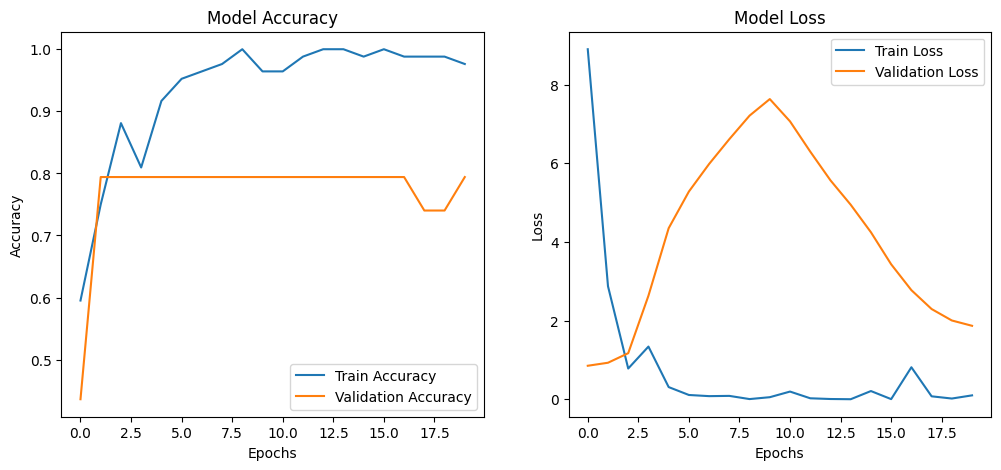

7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 868ms/step


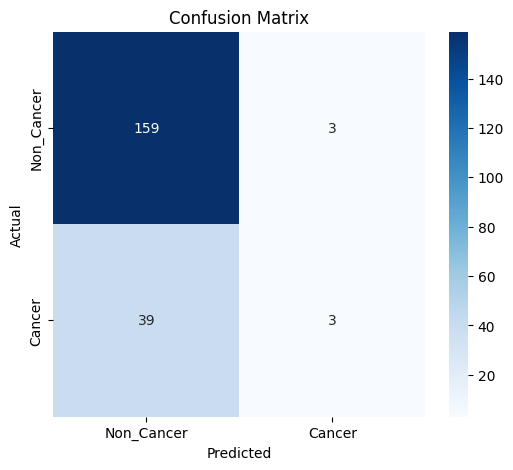

Classification Report:
               precision    recall  f1-score   support

  Non_Cancer       0.80      0.98      0.88       162
      Cancer       0.50      0.07      0.12        42

    accuracy                           0.79       204
   macro avg       0.65      0.53      0.50       204
weighted avg       0.74      0.79      0.73       204



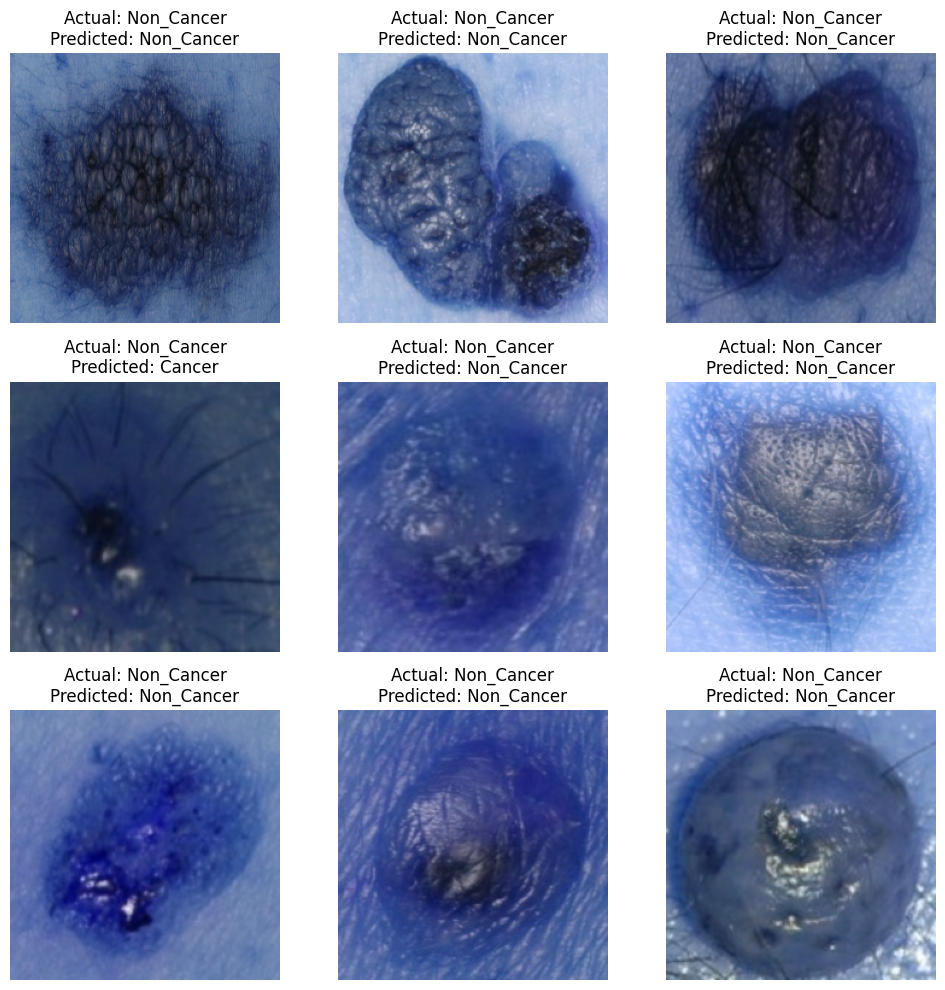

In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical

# Set path to the data folder
data_dir = 'Skin_Data'

# Set image size & batch size
img_size = (224, 224)
batch_size = 32

# Initialize empty lists for loading data
x_train, y_train, x_val, y_val = [], [], [], []

# Load training images
for label, folder_name in enumerate(['Non_Cancer/Training', 'Cancer/Training']):
    folder_path = os.path.join(data_dir, folder_name)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, img_size)
        x_train.append(img)
        y_train.append(label)

# Load validation images
for label, folder_name in enumerate(['Non_Cancer/Testing', 'Cancer/Testing']):
    folder_path = os.path.join(data_dir, folder_name)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, img_size)
        x_val.append(img)
        y_val.append(label)

# Convert lists to numpy arrays
x_train = np.array(x_train) / 255.0  # Normalize pixel values
x_val = np.array(x_val) / 255.0
y_train = np.array(y_train)
y_val = np.array(y_val)

# One-hot encoding (if needed for categorical classification)
y_train = to_categorical(y_train, num_classes=2)
y_val = to_categorical(y_val, num_classes=2)

# Define CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(2, activation='softmax')  # Changed to 2 units for categorical output
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=batch_size, verbose=1)

# Save model
model.save('skin_cancer_model.keras')

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

plt.show()

# Model evaluation
y_pred = np.argmax(model.predict(x_val), axis=1)
y_true = np.argmax(y_val, axis=1)

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non_Cancer', 'Cancer'], yticklabels=['Non_Cancer', 'Cancer'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=['Non_Cancer', 'Cancer']))

# Visualizing some predictions
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.ravel()

for i in range(9):
    img = x_val[i]
    true_label = "Cancer" if y_true[i] == 1 else "Non_Cancer"
    pred_label = "Cancer" if y_pred[i] == 1 else "Non_Cancer"
    
    axes[i].imshow(img)
    axes[i].set_title(f"Actual: {true_label}\nPredicted: {pred_label}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()
